# **BACK PROPAGATION ALGORITHM**

The Backpropagation algorithm looks for the minimum value of the error function in weight space using a technique called the delta rule or gradient descent. The weights that minimize the error function is then considered to be a solution to the learning problem. 


<p align="center">
  <img width="500" height="200" src="https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2017/09/Training-A-Neural-Network-Backpropagation-Edureka-768x314.png">
</p>

To show the implementation of the Back Propagation Algorithm, we built an Artificial Neural Network and test the same using appropriate data sets.



Below is a small contrived dataset that we can use to test out training our neural network.
<p align="center">
  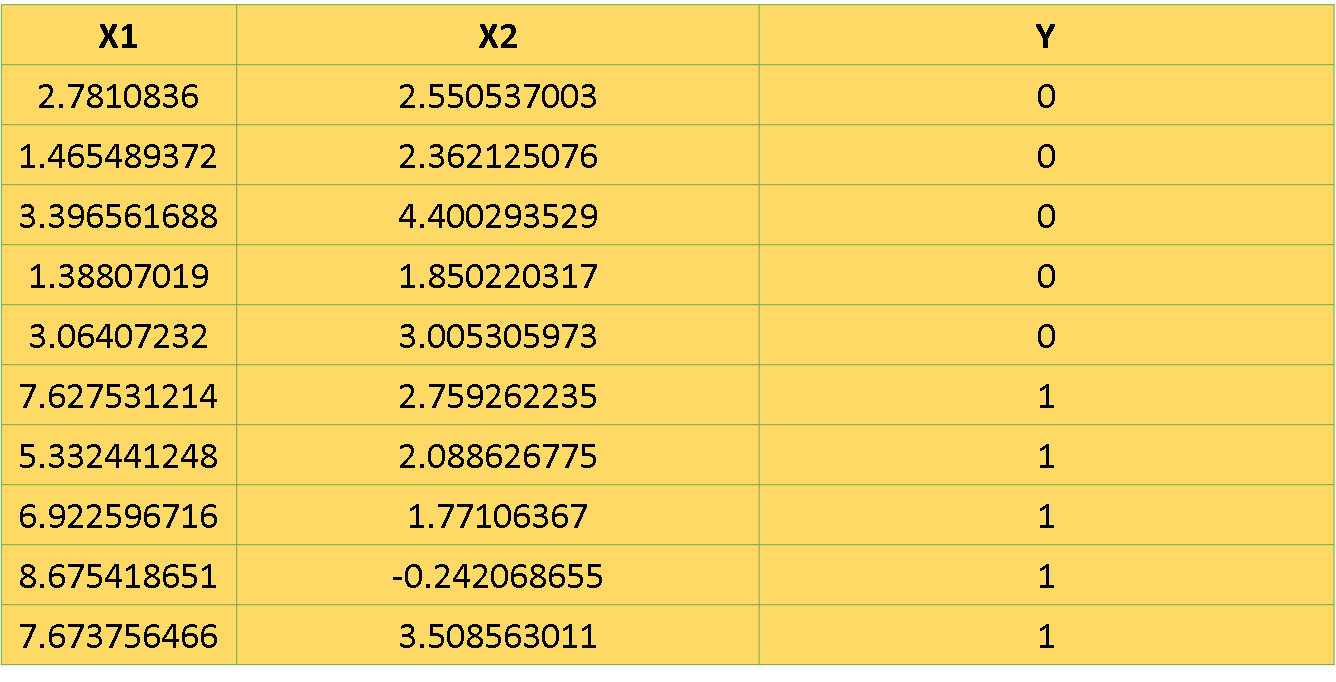
</p>


Below is the process. We will use 2 neurons in the hidden layer. It is a binary classification problem (2 classes) so there will be two neurons in the output layer. The network will be trained for 20 epochs with a learning rate of 0.5, which is high because we are training for so few iterations.

## **INITIALIZE THE NETWORK**

In [ ]:
import random
from math import exp
from random import seed

def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random.uniform(-0.5,0.5) for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random.uniform(-0.5,0.5) for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    i= 1
    print("\n The initialised Neural Network:\n")
    for layer in network:
        j=1
        for sub in layer:
            print("\n Layer[%d] Node[%d]:\n" %(i,j),sub)
            j=j+1
        i=i+1
    return network

# Calculate neuron activation (net) for an input

def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation
 
# Transfer neuron activation to sigmoid function 
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))
 
# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs
 
# Calculate the derivative of an neuron output
def transfer_derivative(output):
    return output * (1.0 - output)
 
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
 

# Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']
 


 





## **TRAIN THE NETWORK FOR A FIXED NUMBER OF EPOCHS**

In [ ]:
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
   
    print("\n Network Training Begins:\n")
    
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    
    print("\n Network Training Ends:\n")

## **TEST TRAINING THE BACKPROPAGATION ALGORITHM**



In [ ]:
seed(2) 
dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]

print("\n The input Data Set :\n",dataset)
n_inputs = len(dataset[0]) - 1
print("\n Number of Inputs :\n",n_inputs)
n_outputs = len(set([row[-1] for row in dataset]))
print("\n Number of Outputs :\n",n_outputs)

#Network Initialization
network = initialize_network(n_inputs, 2, n_outputs)


 The input Data Set :
 [[2.7810836, 2.550537003, 0], [1.465489372, 2.362125076, 0], [3.396561688, 4.400293529, 0], [1.38807019, 1.850220317, 0], [3.06407232, 3.005305973, 0], [7.627531214, 2.759262235, 1], [5.332441248, 2.088626775, 1], [6.922596716, 1.77106367, 1], [8.675418651, -0.242068655, 1], [7.673756466, 3.508563011, 1]]

 Number of Inputs :
 2

 Number of Outputs :
 2

 The initialised Neural Network:


 Layer[1] Node[1]:
 {'weights': [0.4560342718892494, 0.4478274870593494, -0.4434486322731913]}

 Layer[1] Node[2]:
 {'weights': [-0.41512800484107837, 0.33549887812944956, 0.2359699890685233]}

 Layer[2] Node[1]:
 {'weights': [0.1697304014402209, -0.1918635424108558, 0.10594416567846243]}

 Layer[2] Node[2]:
 {'weights': [0.10680173364083789, 0.08120401711200309, -0.3416171297451944]}


## **TRAIN THE NETWORK**

In [ ]:

train_network(network, dataset, 0.5, 20, n_outputs)


print("\n Final Neural Network :")
    
i= 1
for layer in network:
    j=1
    for sub in layer:
        print("\n Layer[%d] Node[%d]:\n" %(i,j),sub)
        j=j+1
    i=i+1


 Network Training Begins:

>epoch=0, lrate=0.500, error=5.278
>epoch=1, lrate=0.500, error=5.122
>epoch=2, lrate=0.500, error=5.006
>epoch=3, lrate=0.500, error=4.875
>epoch=4, lrate=0.500, error=4.700
>epoch=5, lrate=0.500, error=4.466
>epoch=6, lrate=0.500, error=4.176
>epoch=7, lrate=0.500, error=3.838
>epoch=8, lrate=0.500, error=3.469
>epoch=9, lrate=0.500, error=3.089
>epoch=10, lrate=0.500, error=2.716
>epoch=11, lrate=0.500, error=2.367
>epoch=12, lrate=0.500, error=2.054
>epoch=13, lrate=0.500, error=1.780
>epoch=14, lrate=0.500, error=1.546
>epoch=15, lrate=0.500, error=1.349
>epoch=16, lrate=0.500, error=1.184
>epoch=17, lrate=0.500, error=1.045
>epoch=18, lrate=0.500, error=0.929
>epoch=19, lrate=0.500, error=0.831

 Network Training Ends:


 Final Neural Network :

 Layer[1] Node[1]:
 {'weights': [0.8642508164347664, -0.8497601716670761, -0.8668929014392035], 'output': 0.9295587965836384, 'delta': 0.005645382825629247}

 Layer[1] Node[2]:
 {'weights': [-1.2934302410111027

## **PREDICT THE VALUES**

* Making predictions with a trained neural network is easy enough.
We have already seen how to forward-propagate an input pattern to get an output. This is all we need to do to make a prediction. We can use the output values themselves directly as the probability of a pattern belonging to each output class.
* It may be more useful to turn this output back into a crisp class prediction. We can do this by selecting the class value with the larger probability. This is also called the arg max function.
* Below is a function named predict() that implements this procedure. It returns the index in the network output that has the largest probability. It assumes that class values have been converted to integers starting at 0.

In [ ]:
from math import exp

# Calculate neuron activation for an input
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation

# Transfer neuron activation
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

# Make a prediction with a network
def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))

# Test making predictions with the network
dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]
#network = [[{'weights': [-1.482313569067226, 1.8308790073202204, 1.078381922048799]}, {'weights': [0.23244990332399884, 0.3621998343835864, 0.40289821191094327]}],
#    [{'weights': [2.5001872433501404, 0.7887233511355132, -1.1026649757805829]}, {'weights': [-2.429350576245497, 0.8357651039198697, 1.0699217181280656]}]]
for row in dataset:
    prediction = predict(network, row)
    print('Expected=%d, Calculated=%d' % (row[-1], prediction))

Expected=0, Calculated=0
Expected=0, Calculated=0
Expected=0, Calculated=0
Expected=0, Calculated=0
Expected=0, Calculated=0
Expected=1, Calculated=1
Expected=1, Calculated=1
Expected=1, Calculated=1
Expected=1, Calculated=1
Expected=1, Calculated=1
